# Chapter 4
# Classification

#### Classification problem is when we are predicting a qualitative variable.

The response variable in classification will be a class variable. For e.g. if an online transaction is fradulent or not. In this case we have 2 classes.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

__Default Dataset__

We will be looking at default dataset and plot some data.

In [3]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Default.csv"
Default = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Default = Default.rename(columns = {'default':'Default', 'student':'Student','balance':'Balance','income':'Income'})

In [4]:
# The dataset is quite inbalanced so will first take a sample of majority and then do the plotting.
Default_sample = Default.copy()
Default_sample.sort_values(by = 'Default', inplace = True)
Default_sample['sample'] = np.arange(1, len(Default_sample) + 1, 1)
Default_sample.loc[Default_sample.Default == 'Yes', 'sample'] = 0
Default_sample.loc[Default_sample['sample']%30 == 0, 'sample'] = 0
Default_sample = Default_sample[Default_sample['sample'] == 0]
Default_sample['Default'].value_counts()

Yes    333
No     322
Name: Default, dtype: int64

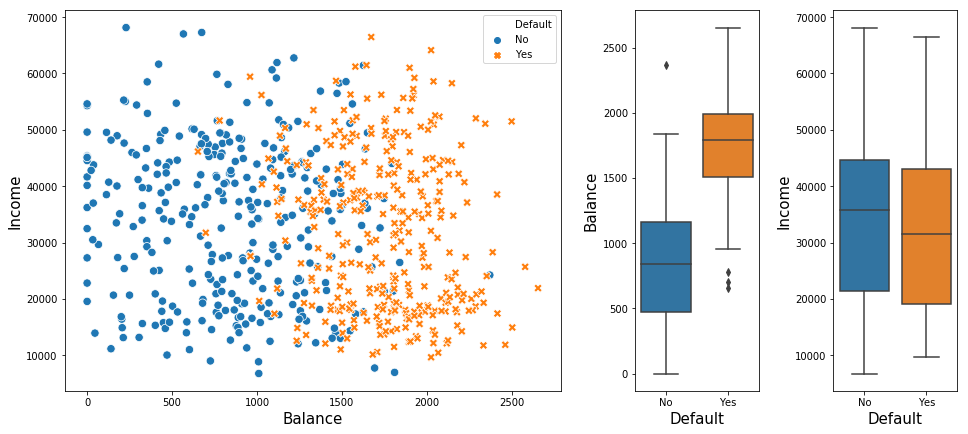

In [6]:
# We will be using seaborn so that we can color based on a third column in scatter plot.
plt.figure(figsize = (16,7))
gs = gridspec.GridSpec(1, 3, width_ratios = [1,0.25,0.25], wspace = 0.30)
ax1 = plt.subplot(gs[0])
ax1 = sns.scatterplot(x = 'Balance', y = 'Income', hue = 'Default', style = 'Default', s = 70, data = Default_sample)
ax1.set_xlabel('Balance',fontsize = 15)
ax1.set_ylabel('Income',fontsize = 15)
ax2 = plt.subplot(gs[1])
ax2 = sns.boxplot(x = 'Default', y = 'Balance', data = Default_sample)
ax2.set_xlabel('Default',fontsize = 15)
ax2.set_ylabel('Balance',fontsize = 15)
ax3 = plt.subplot(gs[2])
ax3 = sns.boxplot(x = 'Default', y = 'Income', data = Default_sample)
ax3.set_xlabel('Default',fontsize = 15)
ax3.set_ylabel('Income',fontsize = 15)
plt.show()

The objective is to predict the 'default' using other variable as predictors. We can see from the plot above that there is quite a strong relationship betweem Default and Balance. People with No Default has much lower Balance then people with Default as Yes.

__Why not Linear Regression?__

1. For linear regression, we need to convert qualitative variable to quantitative. As there is no natural way to convert a quantitative variable, different encoding of qualitative variable would produce fundamentally different linear model.
2. For a binary response with 0/1 coding, least square does not make sense. Some of our estimate might be outside the [0,1] interval and is difficult to interpret as probabilities.

## Logistic Regression

Rather than modeling the response Y directly, logistic regression models the probability that Y belongs to a particular class.
$$0<P(Y=y_i|X) < 1$$
$$or\ P(X)$$
A prediction can be made using a threshold say Y = 1 for $P(Y=y_i|X)$ > 0.5. In a conservative approach, we can see threshold much lower.

Now, if we model P(X) using the equation $$P(X) = \beta_0 + \beta_1 X$$ then P(X) might take a value outside [0,1] depends on the value of X. To avoid this, we need to use a function that gives outputs between 0 and 1 for all values of X.

In logistic regression, we use logistic function
$$P(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$
Shape of logistic function is a S-Shaped curve of this form.
$$\frac{P(X)}{1 - P(X)} = e^{\beta_0 + \beta_1 X}$$
where $$\frac{P(X)}{1 - P(X)}\ =\ odds\ (can\ take\ values\ between\ 0\ and\ infinity)$$
Value close to 0 and infinity indicates very low and high probabilities of success respectively.
$$log(\frac{P(X)}{1 - P(X)}) = \beta_0 + \beta_1 X$$
The left hand side is called the log odds or logit. The logit is linear in X.

In logistic regression model, increasing X by one unit changes the log odds by $\beta_1$ or equivalently it multiplies the odds by $e^{\beta_1}$.

However, the relationship between X and P(X) is not a straight line, $\beta_1$ does not correspond to the change in P(X). Change in the value of P(X) due to one unit change depends on current value of X.

In [5]:
Default['Default_0_1'] = 0
Default.loc[Default['Default'] == 'Yes', 'Default_0_1'] = 1
Default['Student_0_1'] = 0
Default.loc[Default['Student'] == 'Yes', 'Student_0_1'] = 1
Default['Default_0_1'].value_counts()

0    9667
1     333
Name: Default_0_1, dtype: int64

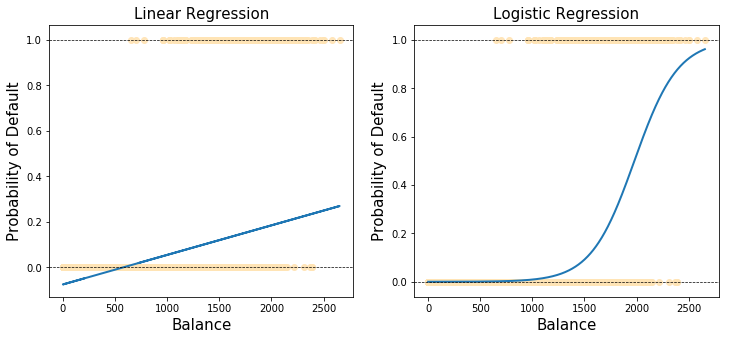

In [65]:
X = np.array(Default['Balance']).reshape(-1,1)
y = np.array(Default['Default_0_1'])

# Fitting a linear regression model for Default data.
lm = LinearRegression()
lm.fit(X,y)

# Now fitting the same using logistic regression.
clf = LogisticRegression()
clf.fit(X,y)

# Plottig the results from 2 different approaches for predicting class variable.
X1 = np.linspace(min(Default['Balance']),max(Default['Balance']) + 1, 1000)
X1 = X1.reshape(-1,1)

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)

ax1.scatter(X,y, color = 'moccasin', alpha = 0.9)
ax1.plot(X,lm.predict(X), linewidth = 2)
ax1.set_xlabel('Balance', fontsize = 15)
ax1.set_ylabel('Probability of Default', fontsize = 15)
ax1.axhline(0, color = 'black', linestyle = "--", linewidth = 0.7)
ax1.axhline(1, color = 'black', linestyle = "--", linewidth = 0.7)
ax1.set_title("Linear Regression", fontsize = 15)
ax2 = fig.add_subplot(122)

ax2.scatter(X,y, color = 'moccasin', alpha = 0.9)
ax2.plot(X1,clf.predict_proba(X1)[::,1], Linewidth = 2)
ax2.set_xlabel('Balance', fontsize = 15)
ax2.set_ylabel('Probability of Default', fontsize = 15)
ax2.axhline(0, color = 'black', linestyle = "--", linewidth = 0.7)
ax2.axhline(1, color = 'black', linestyle = "--", linewidth = 0.7)
ax2.set_title("Logistic Regression", fontsize = 15)
plt.show()

The above figure show the difference between using linear or logistic regression for the predicting class variable. Some probabilities in linear regression are outside 0 and 1 but not in logistic regression.

### Estimating the Regression coefficients :-

Maximum likelihood method is a preferred method to estimate coefficients. The basic intuition behind using maximum likelihood to fit a logistic regression model is :-

We seek estimates for $\beta_0$ and $\beta_1$ such that the predicted probabilities $\hat p(x_i)$ of success for each individual corresponds as closely as possible to the individuals observed success status. In other words, we try to find $\hat \beta_0$ and $\hat \beta_1$ such that plugging these estimates into the model for P(X)yields a number close to one for all individuals who are success and a number close to zero for all individuals who did not.

This can be written as :-

$$l(\beta_0, \beta_1) = \prod_{i,y_i = 1}p(x_i) \prod_{i,y_i = 0}(1 - p(x_i))$$
The estimates $\hat \beta_0$ and $\hat \beta_1$ are choosen to maximize this likelihood function.

In logistic regression, we use z-statistic instead of t-statistic to check significance of coefficients.

Z-statistic is $\frac{\hat \beta_1}{S.E.(\hat \beta_1)}$, so a large value of z-statistics indicates evidence against the null hypothesis $H_0: \beta_1 = 0$. This null hypothesis implies that $P(x) = \frac{e^{\beta_0}}{1 + e^{\beta_0}}$ i.e. P(X) does not depend on X. The purpose of $\beta_0$ is just to adjust the average fitted probabilities to the proportion of ones in the data.

## Multiple Logistic Regression

In case of multiple predictors, 
$$log(\frac{P(X)}{1 + P(X)} = \beta_0 + \beta_1X_1 + ...... + \beta_pX_p$$
where X = ($X_1$, $X_2$,...,$X_p$) are p predictors.
$$=>\ P(X) = \frac{e^{\beta_0 + \beta_1X_1 + ...... + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + ...... + \beta_pX_p}}$$
The interpretation of coefficients changes in multiple logistic regression from simple regression. Multiple regression coefficients gives average effect of a variable assuming other predictors fixed.

__A case of correlation :-__ If we are using 2 correlated variable in the model, the effect of a variable might get reversed from what you've found in univariate model. For eg. 

In [45]:
# Multiple Logistic Regression Model
X = np.array(Default[['Balance','Income','Student_0_1']])
y = np.array(Default['Default_0_1'])

clf_m = LogisticRegression()
clf_m.fit(X,y)

# Simple Logistic Regression Model
X = np.array(Default['Student_0_1']).reshape(-1,1)
y = np.array(Default['Default_0_1'])

clf = LogisticRegression()
clf.fit(X,y)
print(clf.coef_, clf_m.coef_)

[[0.38256903]] [[ 4.07583928e-04 -1.25881515e-04 -2.51031353e-06]]


In this we can see that the student variable is giving a positive coefficients in case of simple regression but a negetive coefficient in case of multiple regression model. The reason for that is for a given value of one variable the other predictor has a different relationship with response variable but the overall impact of that variable is opposite. This is called __confounding__

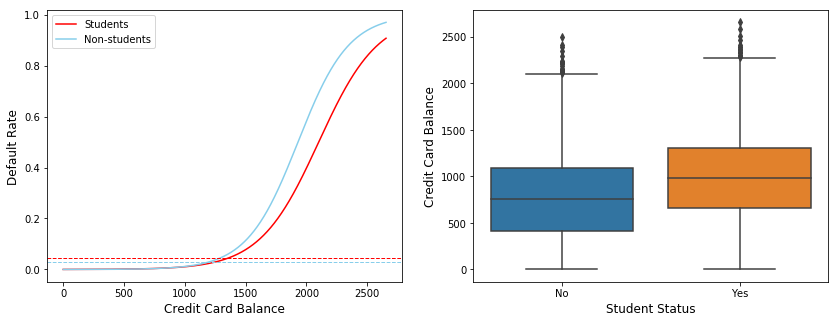

In [78]:
# Fitting our classifier for students and non-students.
X1 = np.array(Default[Default.Student == 'Yes']['Balance']).reshape(-1,1)
y1 = np.array(Default[Default.Student == 'Yes']['Default_0_1'])

clf1 = LogisticRegression()
clf1.fit(X1,y1)

X2 = np.array(Default[Default.Student == 'No']['Balance']).reshape(-1,1)
y2 = np.array(Default[Default.Student == 'No']['Default_0_1'])

clf2 = LogisticRegression()
clf2.fit(X2,y2)

# Plotting the confounding chart.
X = np.arange(min(Default.Balance), max(Default.Balance)).reshape(-1,1)
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(121)
ax1.plot(X, clf1.predict_proba(X)[::,1], color = 'r', label = 'Students')
ax1.plot(X, clf2.predict_proba(X)[::,1], color = 'skyblue', label = 'Non-students')
ax1.axhline(Default[Default['Student'] == 'Yes']['Default_0_1'].value_counts()[1]/Default[Default['Student'] == 'Yes']['Default_0_1'].value_counts()[0],
           color = 'r', linestyle = "--", linewidth = 1)
ax1.axhline(Default[Default['Student'] == 'No']['Default_0_1'].value_counts()[1]/Default[Default['Student'] == 'No']['Default_0_1'].value_counts()[0],
           color = 'skyblue', linestyle = "--", linewidth = 1)
ax1.set_xlabel('Credit Card Balance', fontsize = 12)
ax1.set_ylabel('Default Rate', fontsize = 12)
ax1.legend()

ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(x = 'Student', y = 'Balance', data = Default)
ax2.set_xlabel('Student Status', fontsize = 12)
ax2.set_ylabel('Credit Card Balance', fontsize = 12)
plt.show()

The left chart is showing that the Default rate for a fixed balance is higher in Non-student then students, but the overall default rate is higher in students. But the right chart tells that students tends to have a higher credit card balance (they hold higher level of debts). 
This explains how the regression results from only one variable can be misleading.

Logistic regression is suited for binary response.

## Linear Discriminant Analysis

In this approach, we model the distribution of predictors X seperately in each of the response classes (i.e. given Y), and then use Baye's theorm to flip these around into estimates for P(Y = k|X = x). 

When these distributions assumed to be random it turns out that the model is very similar in form to logistic regression.

#### Why not logistic regression?
1. When the classes are well seperated, the parameter estimates from logistic regression are unstable. If there is a feature that seperates the class perfectly the coefficient can go off to infinity.
2. If n is small and distribution of predictors X is approximately normal in each of the classes, the linear discriminant model is again more stable than the logistic regression.

__Using Baye's theorm for classification :-__

Let the no. classes in the response variable are K $\ge$ 2.
Let $\pi_k$ = overall or prior probability that a randomly chosen observation comes from the $k^{th}$ class.

Let $f_k(x)$ = P(X = x| Y = k) denote the density function of X for an observation that comes from the $k^{th}$ class. Using Baye's theorm,
$$P(Y = k| X = x) or P_k(X) = \frac{\pi_k f_k(x)}{\sum_{i = 1}^{k} \pi_l f_k(l)}$$
$\pi_k$ can be calculated easily from the data. For $f_k(x)$ we have to assume a function form.

$P_k(X)$ = Posterior probability

__Linear discriminant analysis for p = 1 :-__

Assume p = 1.
1. Assumption :- We assume that $f_k(x)$ is normal i.e.
$$f_k(x) = \frac{1}{\sigma_k\sqrt{2\pi}}exp(-\frac{1}{2\sigma_{k}^{2}}(x - \mu_k)^2)$$
where $\mu_k$ and $\sigma_k^2$ are mean and variance for $k^{th}$ class.
2. $\sigma_1^2 = \sigma_2^2 = ......  = \sigma_k^2$ i.e. there is a shared variance term across all K classes.

Now, 
$$P_k(x) = \frac{\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{1}{2\sigma^{2}}(x - \mu_k)^2) \pi_k}{\sum_{i = 1}^{k}\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{1}{2\sigma^{2}}(x - \mu_l)^2) \pi_l}$$
After calculating, we will assign an observation X = x to the class for which $P_k(x)$ is largest.

Taking log in above equation,
$$log(P_k(x)) = log(\pi_k) + log(exp(-\frac{1}{2\sigma^{2}}(x - \mu_k)^2)) - log(constant)$$
$$=>log(\pi_k) - \frac{1}{2\sigma^{2}}(x^2 + \mu_k^2 - 2x\mu_k) - log(constant)$$
$$=> log(\pi_k) + \frac{x\mu_k}{\sigma^2} - \frac{\mu_k^2}{\sigma^2} + constant$$
This means that we assign the observation to a class for which 
$\delta_k(x) = \frac{x\mu_k}{\sigma^2} - \frac{\mu_k^2}{\sigma^2} + log(\pi_k)$  is largest.

__Case :-__ K = 2 and $\pi_1$ and $\pi_2$, then Baye's classifier assign an obaservation to class 1 if $2x(\mu_1-\mu_2) > \mu_1^2 - \mu_2^2$ and to class 2 otherwise.

The decision boundary is:
$$x = \frac{\mu_1 + \mu_2}{2}$$
Now, as in real life we don't know $\mu_1, \mu_2,....., \mu_k$ and $\sigma^2$. The LDA method approximates Bayes classifier by using estimates of $\pi_k$, $\mu_k$ & $\sigma^2$.

$$\hat \mu_k = \frac{1}{n_k} \sum_{i,y_i = k} x_i$$
$$\hat \sigma^2 = \frac{1}{n-k}\sum_{k=1}^{k}\sum_{i,y_i = k}(x_i - \hat \mu_k)^2$$
and $$\hat \pi_k = n_k/n$$
Now using these estimates, we assign an observation to a class for which
$$\delta_k(x) = \frac{x\hat\mu_k}{\sigma^2} - \frac{\hat\mu_k^2}{\sigma^2} + log(\hat\pi_k)\ is\ largest$$

__Linear discriminant analysis for p > 1 :-__

__Assumption__ :- $X$ = ($X_1$, $X_2$, .... , $X_p$) is drawn from a multivariate gaussian distribution, with a class specific mean vector and a common covariance matrix.

* Multivariate Guassian distribution assumes that each individual predictor follows a one-dimensional normal distribution with some correlation between each pair of predictors.

$$X = N(\mu, \sum)$$
$E(X) = \mu$ is the mean if X (a vector with p component).
and Cov(X) = $\sum$ is the p X p covariance matrix of X.
$$f(x) = \frac{1}{(2\pi)^{p/2} |\sum|^{1/2}}exp(-\frac{1}{2}(x - \mu)^T (\sum)^{-1} (x - \mu))$$

In case p>1, the LDA classifier assumes that the observation in the $k^{th}$ class are drawn from a multivariate Guassian distribution N($\mu_k$,$\sum$), where $\mu_k$ is a class specific mean vector, and $\sum$ is a covariance matrix that is common to all K classes.

Then, Baye's classifier assigns an observation X=x to the class for which 
$$\delta_k(x) = x^T(\sum)^{-1}\mu_k - \frac{1}{2}\mu_k^T(\sum)^{-1}\mu_k  + log(\pi_k)\ is\ largest$$
Now, we estimate $\mu_k$ and $\sum$ from the sample and use it to make LDA classifier.

A binary classifier can make 2 types of error:-
1. It can incorrectly assign an individual to 1 when the actual is 0.
1. It can incorrectly assign an individual to 0 when the actual is 1.

Confusion Matrix:-

      |          ACTUAL        |
      |         No   |  Yes    |
      -------------------------|
    P |     |        |         | 
    R |     |        |         |
    E | No  |   TN   |   FN    |
    D |     |        |         |
    I |-----|------------------|
    C |     |        |         |
    T | Yes |   FP   |   TP    |
    E |     |        |         |
    D |     |        |         |
      ---------------------------
      
A confusion matrix is a convinient way to display results.

One issue with LDA is that it is trying to minimize the overall error rate and FN and FP (the 2 possible errors a classifier can make) individually.
So, in case the response rate is too low even a null classifier will achieve an error rate that is only a bit higher than the LDA training set error rate.

In some cases, class-specific performance is important.

Sensitivity = % of true "Yes" identified.

Specificity = % of "No" that are correctly identified.

Now, to create a classifier that has better sensitivity.

The Bayes classifier works by assigning an observation to the class for which the posterior probability $P_k(x)$ is greatest. In the two-class, this amount to assigning an observation to "Yes" class if 
$$P("Yes"| X=x) > 0.5$$
To improve sensitivity, we need to decrease this threshold to some suitable value. However, this may result in increase in overall error rate as we may decrease the specificity. We need to consider what is more important and make the decision accordingly.

In [32]:
# Fitting a LDA model
X = np.array(Default['Balance']).reshape(-1,1)
y = np.array(Default['Default_0_1'])

clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

# printing the Confusion Matrix.
pred_y = [1 if x > 0.5 else 0 for x in clf.predict_proba(X)[::,1]]
tn, fp, fn, tp = confusion_matrix(y, pred_y).ravel()
print("Confusion Matrix for threshold 0.5")
print("     No   Yes")
print("No  ",tn, fn)
print("Yes ",fp,"  ", tp)

Confusion Matrix for threshold 0.5
     No   Yes
No   9643 257
Yes  24    76


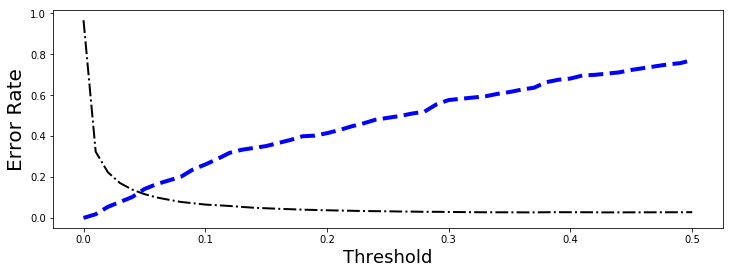

In [64]:
# calculate sensitivity and overall error rate 
threshold = np.linspace(0.0,0.5,51)
prediction = clf.predict_proba(X)[::,1]
sensitivity = []
overall_error = []
for t in threshold:
    pred_y = [1 if x > t else 0 for x in prediction]
    tn, fp, fn, tp = confusion_matrix(y, pred_y).ravel()
    sensitivity.append(fn/(tp+fn))
    overall_error.append((fp+fn)/len(prediction))

plt.figure(figsize = (12,4))
plt.plot(threshold, overall_error, linestyle = "-.", linewidth = 2, color = "black")
plt.plot(threshold, sensitivity, linestyle = "--", linewidth = 4, color = "b")
plt.xlabel("Threshold", fontsize = 18)
plt.ylabel("Error Rate", fontsize = 20)
plt.show()

The plot above shows how changing threshold increase sensitivity(blue) but decrease the overall error rate(black).

__Some important terminology__

    -------------------------------------------------------------------------------------------|
           Name              Definition                Synonyms                                |

    -------------------------------------------------------------------------------------------|
    False Positive Rate  |  FP / Actual N     |  Type I Error, 1 - Specificity                 |
                         |                    |                                                |
    True Positive Rate   |  TP / Actual P     |  1 - Type II error, Power, Sensitivity, Recall |
                         |                    |                                                |
    Positive Pred. Value |  TP / Predicted P  |  Precision, 1 - False recovery proportion      | 
                         |                    |                                                |
    Neg Pred. Value      |  TN / Predicted N  |                                                |
    -------------------------------------------------------------------------------------------|
    
